In [1]:
%autoreload 2
import ajcs
import sqra
import optim
import matplotlib.pyplot as plt
import numpy as np

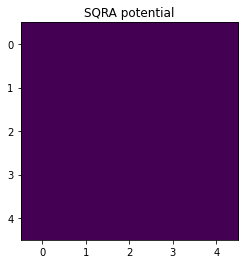

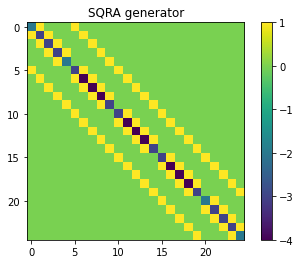

In [2]:
nx = 5
ny = 5


U = np.zeros((ny,nx))
s = sqra.sqra2d(U)
s.plot()

In [3]:
nt = 3
dt = 1
ts = ([dt] * nt)

o=optim.SqraOptim(s, ts, penalty = 0.001, nonautonomous=True)

In [4]:
%time o.optimize(100)

CPU times: user 30.7 s, sys: 323 ms, total: 31 s
Wall time: 33.6 s


 final_simplex: (array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 4.46738724e-06,  4.46738724e-06,  4.46738724e-06, ...,
         4.46738724e-06,  3.48350774e-06,  1.02268362e-07],
       [ 3.12566727e-06,  3.12566727e-06,  3.12566727e-06, ...,
         3.12566727e-06,  2.18650184e-06, -5.27910205e-07],
       [ 2.26060180e-06,  2.26060180e-06,  2.26060180e-06, ...,
         2.26060180e-06,  1.30252757e-06, -3.21523667e-07]]), array([-0.01652403, -0.01652389, -0.01652384, -0.01652384, -0.01652384,
       -0.01652384, -0.01652381, -0.01652381, -0.01652381, -0.01652381,
       -0.0165238 , -0.0165238 , -0.0165238 , -0.0165238 , -0.01652378,
       -0

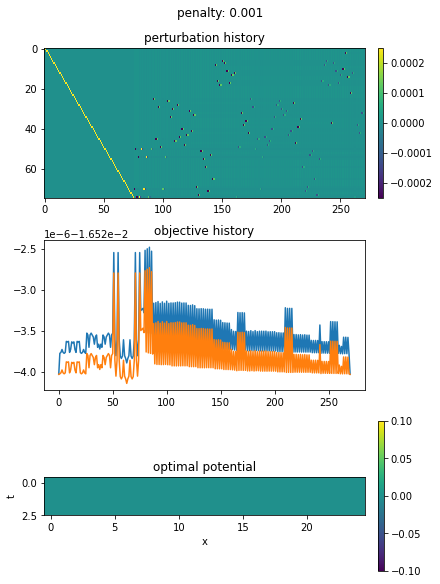

In [5]:
o.plot()

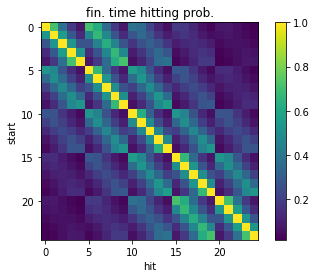

In [6]:
o.plot_fin_hit_prob()

## Result
As expected, no perturbation is necessary for optimal coverage

# Potential Barrier

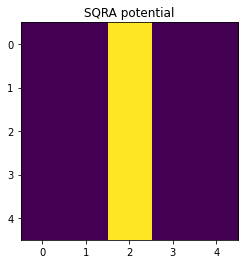

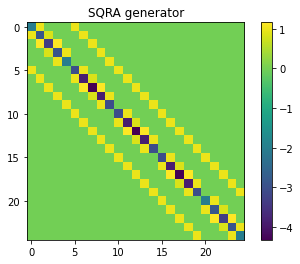

In [7]:
U_p = U.copy()
U_p[:,2] = 0.3
s_p = sqra.sqra2d(U_p)
s_p.plot()

In [8]:
o_p=optim.SqraOptim(s_p, ts, penalty = 0.0001)

In [9]:
%time o_p.optimize(1000)

CPU times: user 2min 31s, sys: 1.79 s, total: 2min 33s
Wall time: 2min 47s


 final_simplex: (array([[ 1.00794934e-03,  4.16173923e-04,  2.64739850e-05, ...,
         3.16072897e-04, -2.26902839e-04, -6.10805622e-04],
       [ 9.90797233e-04,  4.42156260e-04,  7.45922782e-05, ...,
         3.03466078e-04, -2.34806396e-04, -6.01741485e-04],
       [ 9.78546491e-04,  4.89700832e-04,  9.96164930e-05, ...,
         3.41619597e-04, -2.20821535e-04, -5.94946099e-04],
       ...,
       [ 8.36800463e-04,  3.99912199e-04,  1.01946978e-04, ...,
         2.80322118e-04, -1.90559586e-04, -5.10558311e-04],
       [ 8.39528203e-04,  3.66050792e-04,  6.65931898e-05, ...,
         2.58419380e-04, -1.91630904e-04, -5.05691172e-04],
       [ 8.28973860e-04,  3.91349276e-04,  7.60570597e-05, ...,
         2.70078639e-04, -1.84523965e-04, -5.05818771e-04]]), array([-0.01639441, -0.01639433, -0.0163943 , -0.01639427, -0.01639427,
       -0.01639425, -0.01639422, -0.01639413, -0.01639412, -0.01639412,
       -0.01639409, -0.01639408, -0.01639408, -0.01639408, -0.01639407,
       -0

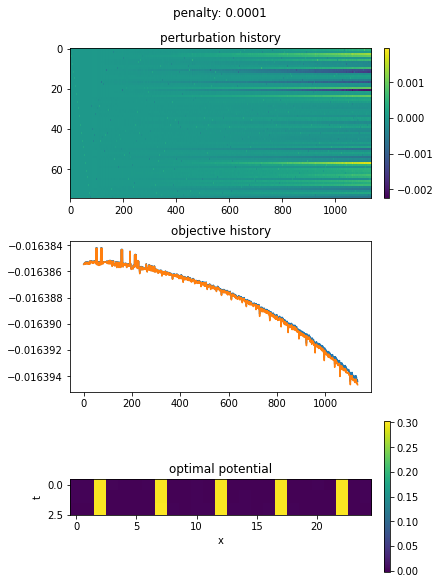

In [10]:
o_p.plot()

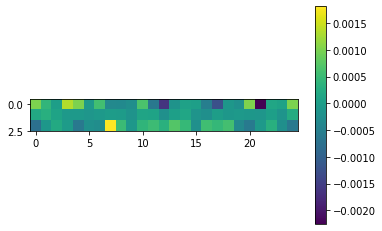

In [11]:
o_p.plot_perturbation()

# Entropic Barrier

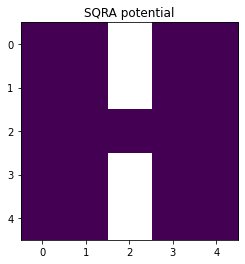

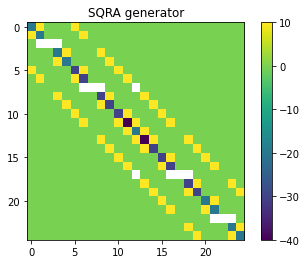

In [78]:
U_h = U.copy()
U_h[:,2] = np.inf
U_h[2,2] = 0
s_h = sqra.sqra2d(U_h, phi=10)
s_h.plot()

In [306]:
o_h=optim.SqraOptim(s_h, ts, penalty = 0.001)

CPU times: user 484 ms, sys: 5.51 ms, total: 490 ms
Wall time: 821 ms


-0.016524034672096746

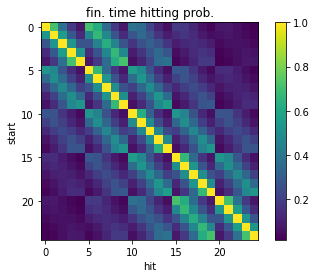

In [318]:
%time o.plot_fin_hit_prob()
o.objective(o.x)

In [319]:
%time o_h.optimize(1000);

CPU times: user 1min 26s, sys: 5.56 s, total: 1min 31s
Wall time: 56.9 s


 final_simplex: (array([[ 1.00000000e-05,  1.00000000e-05,  1.00000000e-05, ...,
         1.00000000e-05,  1.00000000e-05,  1.00000000e-05],
       [ 1.05636370e-05,  1.05636370e-05,  1.05636370e-05, ...,
         1.05636370e-05,  1.05636370e-05,  1.05636370e-05],
       [ 1.33868570e-05,  1.33868570e-05,  1.33868570e-05, ...,
         1.33868570e-05,  1.33868570e-05, -1.23422290e-06],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.17344791e-06,  1.95867174e-05,  1.95867174e-05, ...,
         1.95867174e-05, -3.91730533e-06, -6.35572412e-06],
       [ 9.52187157e-06,  9.52187157e-06,  9.52187157e-06, ...,
         9.52187157e-06,  5.15517219e-06,  4.40689844e-06]]), array([-0.71311573, -0.71310669, -0.71310613, -0.71310497, -0.71310471,
       -0.71310463, -0.7131044 , -0.71310219, -0.71310214, -0.7131021 ,
       -0.71310206, -0.71310193, -0.71310187, -0.71310186, -0.71310182,
       -0

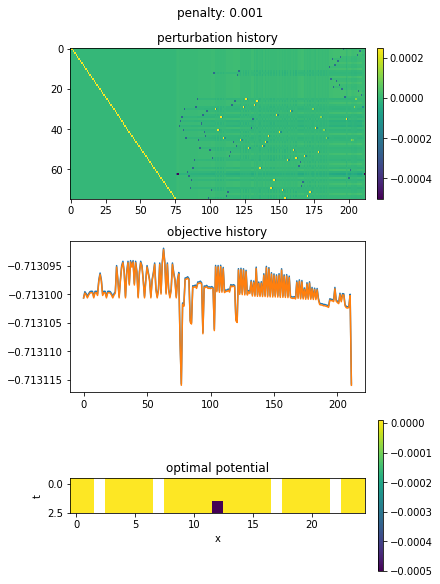

In [320]:
o_h.plot()

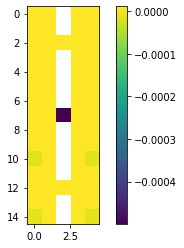

In [279]:
plt.imshow(np.vstack([x for x in o_h.x.reshape(3,5,5) + 0 * o_h.sqra.u.reshape(5,5)]))
plt.colorbar()

In [17]:
idx = (np.reshape(o_h.x, (3,25)) + o_h.sqra.u.flatten() == np.inf).flatten()
np.abs(o_h.x[idx]).sum() * o_h.penalty

0.0

In [18]:
np.abs(o_h.x).sum() * o_h.penalty

0.0

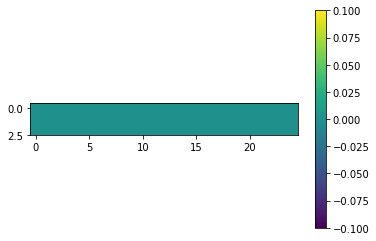

In [19]:
plt.imshow(o_h.x.reshape((nt, ny* nx)))
plt.colorbar()

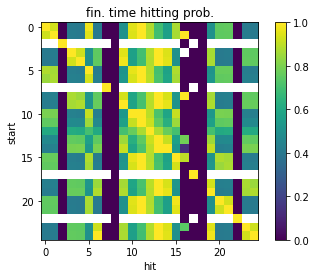

In [20]:
o_h.plot_fin_hit_prob()

In [21]:
o_h.scatter()

In [22]:
o_h.x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [23]:
import plotly.graph_objects as go
xx = o_h.x.reshape((nt, ny, nx))
go.Figure(data = [go.Surface(z = xx[i,:,:] + 2 * i) for i in range(nt)])

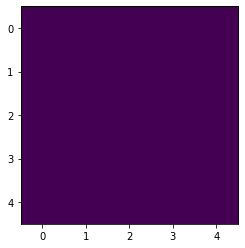

In [24]:
plt.imshow(xx[0,:,:])

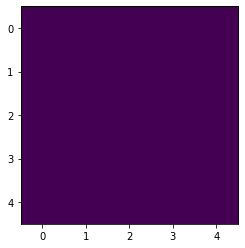

In [25]:
xts = np.reshape(o_h.x, (nt, nx*ny))
plt.imshow(np.reshape(xts[0,:], (ny, nx)))

In [26]:
xts[0,:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

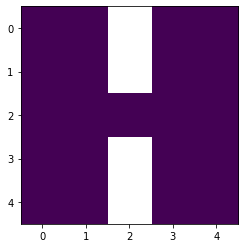

In [27]:
plt.imshow(np.reshape(xts[0,:] + o_h.sqra.u.flatten(), (5,5)))